In [1]:
import sklearn
import numpy as np
import pandas as pd

<h1 style="font-family: Arial; font-size:10;color:red;">Se carga el archivo y se separa en entrenamiento y prueba</h1> 

In [2]:
from sklearn.model_selection import train_test_split
dataALL=pd.read_csv('games.csv')  
N=len(dataALL)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataALL, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [3]:
train_data.shape

(40228, 18)

In [4]:
train_data.head()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
10021,1977,1,1,1,2,1,0,11,4,1,2,0,0,0,1,0,0,1
26201,1595,2,2,2,2,2,0,1,0,0,0,0,7,2,1,3,0,2
26743,1565,2,1,1,1,1,0,10,2,1,2,0,0,0,0,0,0,1
19970,1199,2,2,2,0,2,2,1,0,0,0,0,10,1,0,1,1,2
47201,1590,1,1,2,0,2,1,3,0,0,0,1,9,1,0,3,0,2


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40228 entries, 10021 to 12123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        40228 non-null  int64
 1   firstBlood          40228 non-null  int64
 2   firstTower          40228 non-null  int64
 3   firstInhibitor      40228 non-null  int64
 4   firstBaron          40228 non-null  int64
 5   firstDragon         40228 non-null  int64
 6   firstRiftHerald     40228 non-null  int64
 7   t1_towerKills       40228 non-null  int64
 8   t1_inhibitorKills   40228 non-null  int64
 9   t1_baronKills       40228 non-null  int64
 10  t1_dragonKills      40228 non-null  int64
 11  t1_riftHeraldKills  40228 non-null  int64
 12  t2_towerKills       40228 non-null  int64
 13  t2_inhibitorKills   40228 non-null  int64
 14  t2_baronKills       40228 non-null  int64
 15  t2_dragonKills      40228 non-null  int64
 16  t2_riftHeraldKills  40228 non-null  

In [8]:
train_data[["gameDuration", "firstBlood","firstTower","firstInhibitor"]].describe()

,gameDuration,firstBlood,firstTower,firstInhibitor
count,40228.000000,40228.000000,40228.000000,40228.000000
mean,1871.062593,1.487223,1.483469,1.339937
std,451.119442,0.499843,0.500578,0.653746
min,610.000000,1.000000,0.000000,0.000000
25%,1554.000000,1.000000,1.000000,1.000000
50%,1845.000000,1.000000,1.000000,1.000000
75%,2156.000000,2.000000,2.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000


<h1 style="font-family: Arial; font-size:10;color:red;">Pipeline para los atributos numéricos</h1> 

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 17 atributos numéricos
num_attribs = ["gameDuration", "firstBlood", "firstInhibitor", "firstTower","firstDragon","firstBaron","firstRiftHerald","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t1_riftHeraldKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills","t2_riftHeraldKills"]

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])

<h1 style="font-family: Arial; font-size:10;color:red;">Pipeline completo</h1> 

In [13]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

<h1 style="font-family: Arial; font-size:10;color:red;">Extraemos las etiquetas de clase</h1> 

In [14]:
X_train = full_pipeline.fit_transform(train_data)

In [15]:
X_train.shape

(40228, 17)

In [16]:
X_train[0,:]

array([ 0.2348352 , -0.97476398, -0.5199905 , -0.96583433, -0.90018074,
        1.25780095, -0.90844956,  1.38001177,  2.31767183,  1.04241881,
        0.48414712, -0.58806731, -1.49032611, -0.80003301,  0.93420777,
       -1.17987928, -0.5713797 ])

In [17]:
y_train = train_data["winner"]
y_train

10021    1
26201    2
26743    1
19970    2
47201    2
        ..
13424    2
29810    2
11397    1
8859     1
12123    2
Name: winner, Length: 40228, dtype: int64

<h1 style="font-family: Arial; font-size:10;color:red;">Construcción de la red neuronal</h1> 


In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo1 = MLPClassifier(activation='logistic',solver='lbfgs',max_iter=500, alpha=1e-5,hidden_layer_sizes=(10,8), random_state=123)
modelo1.fit(X_train, y_train)
scores1 = cross_val_score(modelo1, X_train, y_train, cv=5, scoring='accuracy')
print(scores1)
scores1.mean()

/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.97750435 0.97775292 0.97899577 0.98085768 0.98160348]


0.9793428401977629

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo2 = MLPClassifier(activation='relu',solver='lbfgs', max_iter=500, alpha=1e-5,hidden_layer_sizes=(7,6,5), random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='accuracy')
print(scores2)
scores2.mean()

/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1)

[0.97849863 0.9787472  0.97999006 0.97961467 0.98085768]


/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9795416473363925

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo3 = MLPClassifier(activation='identity',solver='adam', alpha=1e-5,hidden_layer_sizes=(10,10,10), random_state=123)
modelo3.fit(X_train, y_train)
scores3 = cross_val_score(modelo3, X_train, y_train, cv=5, scoring='accuracy')
print(scores3)
scores3.mean()

[0.97253294 0.9711658  0.97203579 0.97228092 0.9697949 ]


0.9715620699931268

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo4 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(18), random_state=123)
modelo4.fit(X_train, y_train)
scores4 = cross_val_score(modelo4, X_train, y_train, cv=5, scoring='accuracy')
print(scores4)
scores4.mean()

[0.97986577 0.97912006 0.98110863 0.97924177 0.98284649]


0.9804365420893257

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo5 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(9,9), random_state=123)
modelo5.fit(X_train, y_train)
scores5 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores5)
scores5.mean()

[0.97663435 0.97651007 0.9762615  0.97911746 0.97862026]


0.9774287282556624

<h1 style="font-family: Arial; font-size:10;color:red;">Analicemos el desempeño en el conjunto de prueba</h1> 

In [32]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.41219919,  1.02588936, -2.04965615, ..., -0.6845599 ,
         0.46089035,  1.75014969],
       [-0.55875607, -0.97476398,  1.00967515, ...,  0.93420777,
        -0.35949447, -0.5713797 ],
       [ 0.70921657,  1.02588936, -0.5199905 , ..., -0.6845599 ,
        -0.35949447, -0.5713797 ],
       ...,
       [ 0.51192712, -0.97476398, -0.5199905 , ...,  2.55297544,
         2.10165997, -0.5713797 ],
       [-0.7737794 ,  1.02588936, -0.5199905 , ..., -0.6845599 ,
        -0.35949447, -0.5713797 ],
       [ 0.84443743, -0.97476398, -0.5199905 , ..., -0.6845599 ,
         1.28127516, -0.5713797 ]])

In [33]:
y_pred1 = modelo1.predict(X_test)
y_pred1

array([2, 2, 1, ..., 1, 1, 1])

In [34]:
y_pred2 = modelo2.predict(X_test)
y_pred2

array([2, 2, 1, ..., 2, 1, 1])

In [35]:
y_pred3 = modelo3.predict(X_test)
y_pred3

array([2, 2, 1, ..., 1, 1, 1])

In [36]:
y_pred4 = modelo4.predict(X_test)
y_pred4

array([2, 2, 1, ..., 1, 1, 1])

In [37]:
y_pred5 = modelo5.predict(X_test)
y_pred5

array([2, 2, 1, ..., 1, 1, 1])

In [38]:
y_test = test_data["winner"]
y_test

36062    2
41334    2
29984    1
43409    2
44812    1
        ..
28863    1
31941    1
41138    1
9636     1
15531    1
Name: winner, Length: 10058, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred1)
print(accuracy1)

0.980612447802744


In [42]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, y_pred2)
print(accuracy2)

0.9802147544243388


In [43]:
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, y_pred3)
print(accuracy3)

0.9722608868562338


In [44]:
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test, y_pred4)
print(accuracy4)

0.9811095645257506


In [45]:
from sklearn.metrics import accuracy_score
accuracy5 = accuracy_score(y_test, y_pred5)
print(accuracy5)

0.9768343607078942


<h1 style="font-family: Arial; font-size:10;color:red;" align="center">Tabla 1. Accuracy</h1> 

| Modelo| Accuracy |
| --- | --- |
| 1 |0.9806 |
| 2 |0.9802 |
| 3 |0.9722 |
| 4 |0.9811 |
| 5 |0.9768 |

<p style="font-family: Arial; font-size:10;color:black;">Los hiperparámetros que por el
momento permiten obtener la red con mayor accuracy son: función de 
activación ='tanh',solver='adam' y hidden_layer_sizes=(18).</p> 

<h1 style="font-family: Arial; font-size:10;color:red;">Matrices de Confusión</h1> 

<h2 style="font-family: Arial; font-size:10;color:black;">Modelo 1</h2> 

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test, y_pred1)
confusion_matrix1

array([[5019,   99],
       [  96, 4844]])

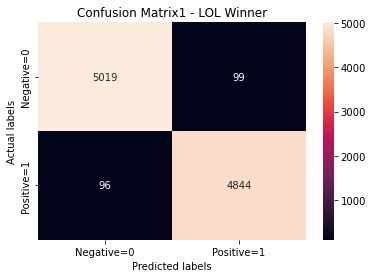

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix1 - LOL Winner') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

<h2 style="font-family: Arial; font-size:10;color:black;">Modelo 2</h2> 

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix2 = confusion_matrix(y_test, y_pred2)
confusion_matrix2

array([[5006,  112],
       [  87, 4853]])

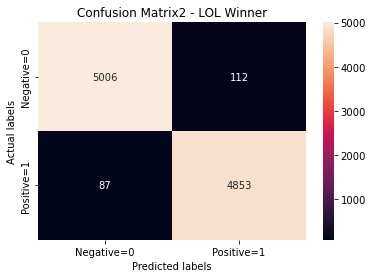

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix2 - LOL Winner') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

<h2 style="font-family: Arial; font-size:10;color:black;">Modelo 3</h2> 

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix3 = confusion_matrix(y_test, y_pred3)
confusion_matrix3

array([[4966,  152],
       [ 127, 4813]])

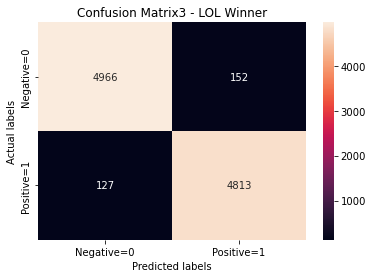

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix3 - LOL Winner') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

<h2 style="font-family: Arial; font-size:10;color:black;">Modelo 4</h2> 

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix4 = confusion_matrix(y_test, y_pred4)
confusion_matrix4

array([[5014,  104],
       [  86, 4854]])

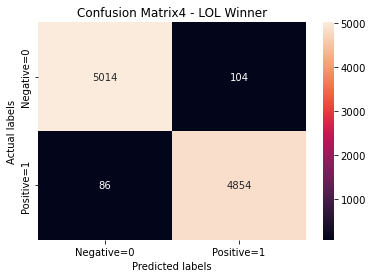

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix4 - LOL Winner') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

<h2 style="font-family: Arial; font-size:10;color:black;">Modelo 5</h2> 

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix5 = confusion_matrix(y_test, y_pred5)
confusion_matrix5

array([[4988,  130],
       [ 103, 4837]])

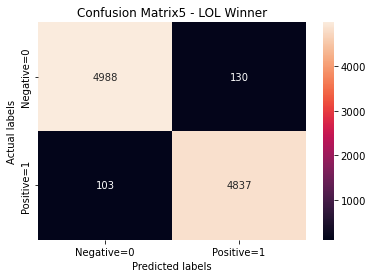

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix5 - LOL Winner') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

<h1 style="font-family: Arial; font-size:10;color:red;">Modelo adicional</h1> 

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modeloAdd1 = MLPClassifier(learning_rate_init = 1,activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(18), random_state=123)
modeloAdd1.fit(X_train, y_train)
scoresAdd1 = cross_val_score(modeloAdd1, X_train, y_train, cv=5, scoring='accuracy')
print(scoresAdd1)
scoresAdd1.mean()

[0.96358439 0.95550584 0.951653   0.96532007 0.95463021]


0.9581387012249485

In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modeloAdd2 = MLPClassifier(learning_rate_init = 0.001,activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(18), random_state=123)
modeloAdd2.fit(X_train, y_train)
scoresAdd2 = cross_val_score(modeloAdd2, X_train, y_train, cv=5, scoring='accuracy')
print(scoresAdd2)
scoresAdd2.mean()

[0.97986577 0.97912006 0.98110863 0.97924177 0.98284649]


0.9804365420893257

In [70]:
y_predAdd1 = modeloAdd1.predict(X_test)
y_predAdd1

array([2, 2, 1, ..., 1, 1, 1])

In [75]:
y_predAdd2 = modeloAdd2.predict(X_test)
y_predAdd2

array([2, 2, 1, ..., 1, 1, 1])

In [72]:
from sklearn.metrics import accuracy_score
accuracyAdd1 = accuracy_score(y_test, y_predAdd1)
print(accuracyAdd1)

0.9625173990853052


In [76]:
from sklearn.metrics import accuracy_score
accuracyAdd2 = accuracy_score(y_test, y_predAdd2)
print(accuracyAdd2)

0.9811095645257506


<p style="font-family: Arial; font-size:10;color:black;">El hiperparámetro learning_rate_init controla el valor inicial de la tasa de aprendizaje, en caso de ser un valor constante como en este caso, maneja este valor como tasa de aprendizaje durante todo el proceso de entrenamiento.</p> 
<p style="font-family: Arial; font-size:10;color:black;">Podemos observar que un valor de 0.001 en comparación con un valor de 1 en la tasa de aprendizaje representa un valor de accuracy más óptimo dado que aunque toma mas tiempo permite un entrenamiento mas estable cada vez que se modifican los pesos del modelo. Las tasas de aprendizaje que son demasiado altas pueden resultar en procesos de entrenamiento inestables o en el aprendizaje de un conjunto de pesos subóptimo.

Observamos de igual forma que un valor de 0.001 en la tasa de aprendizaje mantiene el mismo valor de Accuracy previamente obtenido cuando no se había incluido este hiperparámetro (Tabla 1. Modelo 4) </p>